<a href="https://colab.research.google.com/github/rafaelmattos/Introducao-a-Ciencias-de-Dados/blob/main/Aula4_solucao_exercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Exercícios Resolvidos ICD - Aula 6 </h1>

Edesio Alcobaça (edesio@usp.br)<br>


MBA em Ciência de Dados <br>
Universidade de São Paulo, São Carlos, Brasil<br>
Copyright (c) 2021

### Exercícios de fixação

Não é necessário entregar os exercícios abaixo, mas é importante resolvê-los para fixar os conteúdos estudados.

1 - Repita todos os passos acima para a base de dados BreastCancer.

2 - Compare os três metodos de classificação para a base vertebralcolumn-3C.

3 - Faça a classificação dos dados gerados artificialmente com o código abaixo. Gere as regiões de separação para os métodos estudados nessa aula.

```python
from sklearn import datasets
plt.figure(figsize=(6,4))

n_samples = 1000

data  = datasets.make_moons(n_samples=n_samples, noise=.05)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)
```

In [ ]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: __MACOSX/._data         
  inflating: data/Advertising.csv    
  inflating: __MACOSX/data/._Advertising.csv  
  inflating: data/breastcancer_test.csv  
  inflating: __MACOSX/data/._breastcancer_test.csv  
  inflating: data/.DS_Store          
  inflating: __MACOSX/data/._.DS_Store  
  inflating: data/breastcancer_training.csv  
  inflating: __MACOSX/data/._breastcancer_training.csv  
  inflating: data/Vehicle.csv        
  inflating: __MACOSX/data/._Vehicle.csv  
  inflating: data/exercicio8.txt     
  inflating: __MACOSX/data/._exercicio8.txt  
  inflating: data/concrete_data.csv  
  inflating: __MACOSX/data/._concrete_data.csv  
  inflating: data/iris-with-errors.csv  
  inflating: __MACOSX/data/._iris-with-errors.csv  
  inflating: data/data.zip           
  inflating: __MACOSX/data/._data.zip  
  inflating: data/winequality-red.csv  
  inflating: __MACOSX/data/._winequality-red.csv  
  inflating: data/dermatology.data   
  inflatin

<h2> 1 - Repita todos os passos acima para a base de dados BreastCancer. </h2>

Carregar bibliotecas necessárias para execução:

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

Ler conjunto de dados e estudá-lo:

In [ ]:
data = pd.read_csv("data/BreastCancer.csv", header=(0))
data["Class"] = data["Class"].astype("category")

lin, col = data.shape
print(f"Number of features: {col-1}")
print(f"Number of examples: {lin}")

Number of features: 10
Number of examples: 699


In [ ]:
# olhar os 10 primeiros exemplos
# data[data.columns[5]].plot.hist()
data.head(10)

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0
5,1017122,8,10,10,8,7,10.0,9,7,1,1
6,1018099,1,1,1,1,2,10.0,3,1,1,0
7,1018561,2,1,2,1,2,1.0,3,1,1,0
8,1033078,2,1,1,1,2,1.0,1,1,5,0
9,1033078,4,2,1,1,2,1.0,2,1,1,0


In [ ]:
# verificar se existem NaN
data.isnull().values.any()

True

Vamos remover a coluna ID e remover exemplos com NaN:

In [ ]:
data = data.dropna(axis="rows") # remove NaN
data = data.drop("Id", axis=1) # remove Id

lin, col = data.shape
print(f"Number of features: {col-1}")
print(f"Number of examples: {lin}")

Number of features: 9
Number of examples: 683


In [ ]:
# descrever a coluna classe
data["Class"].describe()

count     683
unique      2
top         0
freq      444
Name: Class, dtype: int64

In [ ]:
# frequencia das classes
data["Class"].value_counts() / data.shape[0]

0    0.650073
1    0.349927
Name: Class, dtype: float64

In [ ]:
# descrição do conjunto de dados
data.describe()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


Após análise inicial dos dados, vamos dividi-los para então aplicar os algoritmos de AM:

In [ ]:
features = data.drop("Class", axis=1)
target = data["Class"]

X = features.values
y = target.values
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(683, 9) (683,)
(546, 9) (546,)
(137, 9) (137,)


<h3> Classificação com K-Nearest Neighbors (KNN) </h3>

Antes de usar o KNN é necessário fazer com que cada feature tenha o mesmo peso para o classificador.<br>
Para isso podemos usar o <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">StandardScaler</a>

StandardScaler vai padronizar a feature movendo a média e variância para 0 e 1 respectivamente.<br>
Para a amostra x o cálculo é feito como segue:

$z = \dfrac{(x - \mu)}{\sigma}$
    

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

mean_X_train_std = np.mean(X_train_std, axis=0)
var_X_train_std = np.var(X_train_std, axis=0)
print(f"Mean: {mean_X_train_std}")
print(f"Mean: {var_X_train_std}")

Mean: [-1.18749129e-16 -3.49740587e-17 -1.50469787e-16 -3.98541599e-17
  2.46445111e-16  2.72472317e-17 -1.61043340e-16 -9.76020241e-18
  3.25340080e-18]
Mean: [1. 1. 1. 1. 1. 1. 1. 1. 1.]


Para isso, podemos usar a classe
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">KNeighborsClassifier</a>, que gera 'modelos' do algoritmo KNN.

In [ ]:
# cria um objeto que representa o algoritmo KNN
model = KNeighborsClassifier(
    n_neighbors= 2, # número de vizinhos
    metric= 'euclidean' # métrica
)

# Cria o "modelo" para o KNN com o método "fit"
# Aqui usamos os dados de treino para gerar o modelo
model.fit(
    X_train_std, # features/atributos de TREINO
    y_train # target/classe de TREINO
)

# faz a predição no conjunto com o método 'predict'
y_pred = model.predict(X_test_std)

O erro na classificação pode ser quantificado pela medida de acurácia:

In [ ]:
acc = round(accuracy_score(y_test, y_pred), 2)
print(f"Accuracy: {acc}")

Accuracy: 0.92


O valor de $k$ (i.e., <mark>n_neighbors</mark>) também pode ser ajustado e a acurácia pode variar bastante dependendo desse valor.<br>
Vamos utilizar a validação cruzada (<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html">cross_validate</a>) para selecionar esse valor :


In [ ]:
folds = 10 # número de folds
k_values = [] # armazena os valores de k
acc_train = []
acc_test = []
k_max = 20

for k in range(1, k_max+1):
    # cria modelo
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')

    # realiza a validação cruzada
    cv = cross_validate(model, X_train_std, y_train, cv=folds, return_train_score=True)
    # print(cv)
    #print('k:', k, 'accurace:', cv['test_score'].mean())
    acc_train.append(cv['train_score'].mean())
    acc_test.append(cv['test_score'].mean())
    k_values.append(k)


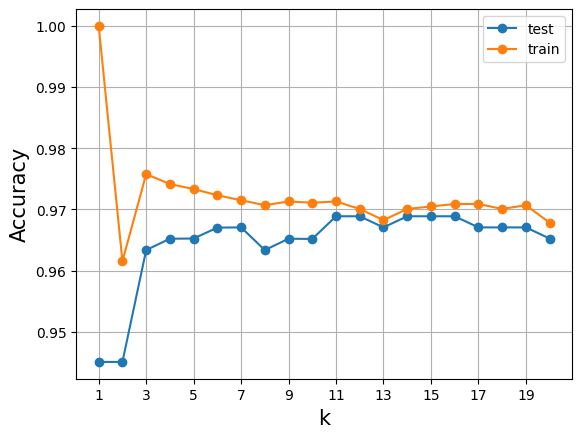

[ 1  2  3  8 10  4  9  5 20  6  7 19 13 17 18 11 12 14 15 16]
[0.94508418 0.94508418 0.963367   0.963367   0.96518519 0.96521886
 0.96521886 0.96525253 0.96525253 0.96703704 0.96707071 0.96707071
 0.96707071 0.96707071 0.96707071 0.96888889 0.96888889 0.96888889
 0.96888889 0.96888889]
Best k is : 11


In [ ]:
plt.plot(k_values, acc_test, "-o", label="test")
plt.plot(k_values, acc_train, "-o", label="train")
plt.xlabel("k", fontsize= 15)
plt.ylabel("Accuracy", fontsize= 15)
plt.xticks(np.arange(1, k_max+1, 2))
plt.grid()
plt.legend(loc="best")
plt.show(True)

k_values = np.array(k_values)
acc_test = np.array(acc_test)
best_k = k_values[np.argmax(acc_test)]
print(k_values[np.argsort(acc_test)])
print(acc_test[np.argsort(acc_test)])
print('Best k is :', best_k)

Agora, usando todo o conjunto de dados vamos gerar o modelo final e testar no conjunto de teste previamente separado:

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=best_k, metric = 'euclidean')
knn_model.fit(X_train_std, y_train)
y_pred = knn_model.predict(X_test_std)

acc = round(accuracy_score(y_test, y_pred), 2)
print(f"Accuracy: {acc}")

Accuracy: 0.96


<h3> Classificação com Logistic Regression (LR) </h3>

Para isso, podemos usar a classe
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">LogisticRegression</a>, que gera modelos do algoritmo LR.

Você também pode normalizar e usar os dados normalizados. Isso ajudará na convergência mas não é necessário para todos os solvers.<br>
Portanto, vamos usar os dados normalizados, apenas para ajudar na convergência do solver. <br>

In [ ]:
lr_model = LogisticRegression(max_iter = 1000, random_state=42)
lr_model.fit(X_train_std, y_train)
y_pred = lr_model.predict(X_test_std)

acc = round(accuracy_score(y_test, y_pred), 2)
print(f"Accuracy: {acc}")

Accuracy: 0.96


Sem os dados normalizados:

In [ ]:
model = LogisticRegression(max_iter = 1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = round(accuracy_score(y_test, y_pred), 2)
print(f"Accuracy: {acc}")

Accuracy: 0.96


<h3> Classificação com Naive Bayes (NB) </h3>

Para isso, podemos usar a classe
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB">GaussianNB</a>, que gera modelos do algoritmo NB.

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

acc = round(accuracy_score(y_test, y_pred), 2)
print(f"Accuracy: {acc}")

Accuracy: 0.96


<h2> 2 - Compare os três métodos de classificação para a base vertebralcolumn-3C. </h2>

Neste exercício vamos comparar o KNN, NB e LR.

Carregar bibliotecas necessárias para execução:

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Ler conjunto de dados e estudá-lo:

In [ ]:
data = pd.read_csv("data/vertebralcolumn-3C.csv", header=(0))

lin, col = data.shape
print(f"Number of features: {col-1}")
print(f"Number of examples: {lin}")

Number of features: 6
Number of examples: 310


In [ ]:
# olhar os 10 primeiros exemplos
# data[data.columns[5]].plot.hist()
data.head(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Hernia
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Hernia
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,Hernia
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Hernia
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Hernia


In [ ]:
# verificar se existem NaN
data.isnull().values.any()

False

In [ ]:
# descrever a coluna classe
data["class"].describe()

count                   310
unique                    3
top       Spondylolisthesis
freq                    150
Name: class, dtype: object

In [ ]:
# frequencia das classes
data["class"].value_counts() / data.shape[0]

Spondylolisthesis    0.483871
Normal               0.322581
Hernia               0.193548
Name: class, dtype: float64

In [ ]:
# descrição do conjunto de dados
data.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767933
75%,72.877696,22.120395,63.000000,52.695889,125.467675,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [ ]:
features = data.drop("class", axis=1)
target = data["class"]

X = features.values
y = target.values
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(310, 6) (310,)
(248, 6) (248,)
(62, 6) (62,)


In [ ]:
models = [
    ("KNN5", Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=5, metric= "euclidean"))
    ])),
    ("KNN10", Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=10, metric= "euclidean"))
    ])),
    ('NB', GaussianNB()),
    ('RL', LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000, random_state=42))
]

In [ ]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Evaluating model from {name} ...")

    # teste depois o report, ele apresentará a você diversas métricas
    # report = classification_report(y_test, y_pred)
    # print(report)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy ({name}): {round(acc, 2)}")

Evaluating model from KNN5 ...
Accuracy (KNN5): 0.79
Evaluating model from KNN10 ...
Accuracy (KNN10): 0.81
Evaluating model from NB ...
Accuracy (NB): 0.87
Evaluating model from RL ...
Accuracy (RL): 0.87


<h2> 3 - Faça a classificação dos dados gerados artificialmente com o código abaixo. Gere as regiões de separação para os métodos estudados nessa aula. </h2>

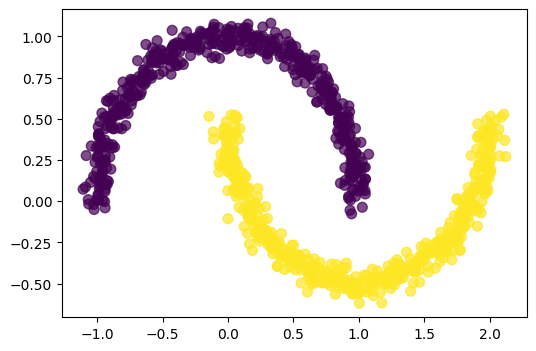

In [ ]:
from sklearn import datasets
from mlxtend.plotting import plot_decision_regions


plt.figure(figsize=(6,4))

n_samples = 1000
data  = datasets.make_moons(n_samples=n_samples, noise=.05, random_state=42)

X = data[0]
y = data[1]

plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

In [ ]:
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1000, 2) (1000,)
(800, 2) (800,)
(200, 2) (200,)


In [ ]:
models = [
    ("KNN", Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=3, metric= "euclidean"))
    ])),
    ('NB', GaussianNB()),
    ('RL', LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000, random_state=42))
]

Evaluating model from KNN ...
Accuracy (KNN): 1.0


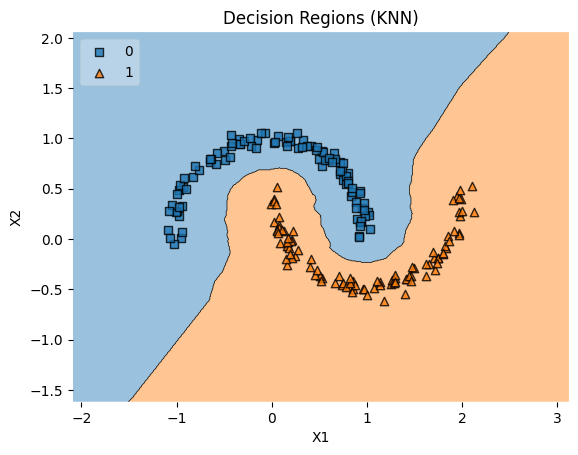

Evaluating model from NB ...
Accuracy (NB): 0.89


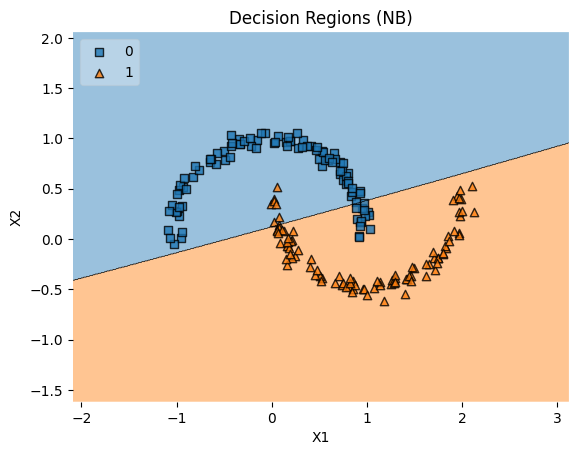

Evaluating model from RL ...
Accuracy (RL): 0.89


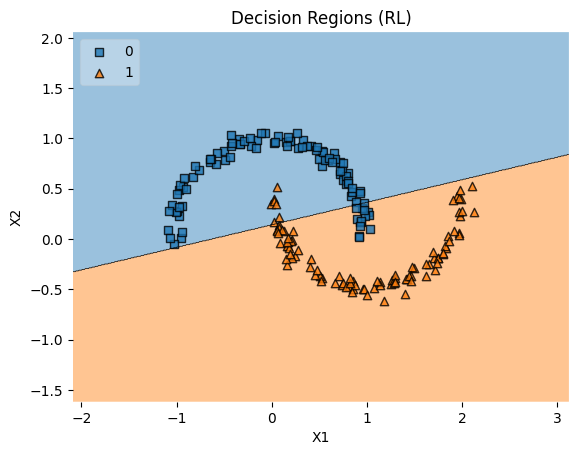

In [ ]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Evaluating model from {name} ...")

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy ({name}): {round(acc, 2)}")

    plot_decision_regions(X_test, y_test, clf=model, legend=2)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Regions (%s)' % name)
    plt.show()